### importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
hoston = sklearn.datasets.load_boston()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [3]:
print(hoston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
df=pd.DataFrame(hoston.data , columns = hoston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
# adding target columns to DF
df['PRICE']=hoston.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#checkin the num of rows and columns 
df.shape

(506, 14)

In [12]:
#check missing
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
# missig data ?

for col in df.columns:
    prct_missing = np.mean(df[col].isnull()).round(3)
    print(f'{col} ->  {prct_missing}')


CRIM ->  0.0
ZN ->  0.0
INDUS ->  0.0
CHAS ->  0.0
NOX ->  0.0
RM ->  0.0
AGE ->  0.0
DIS ->  0.0
RAD ->  0.0
TAX ->  0.0
PTRATIO ->  0.0
B ->  0.0
LSTAT ->  0.0
PRICE ->  0.0


In [14]:
#some statistical 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.dropna(inplace=True)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
corr = df.corr()

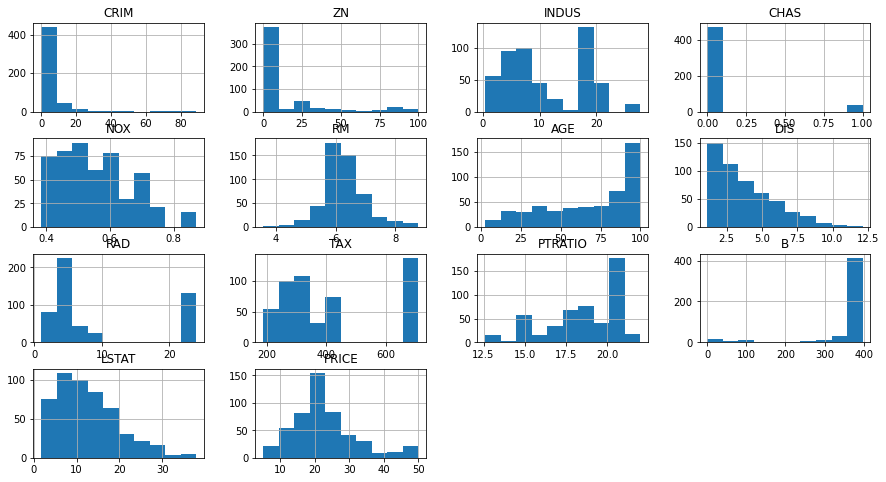

In [19]:
df.hist(figsize=(15,8))
plt.show()

<AxesSubplot:>

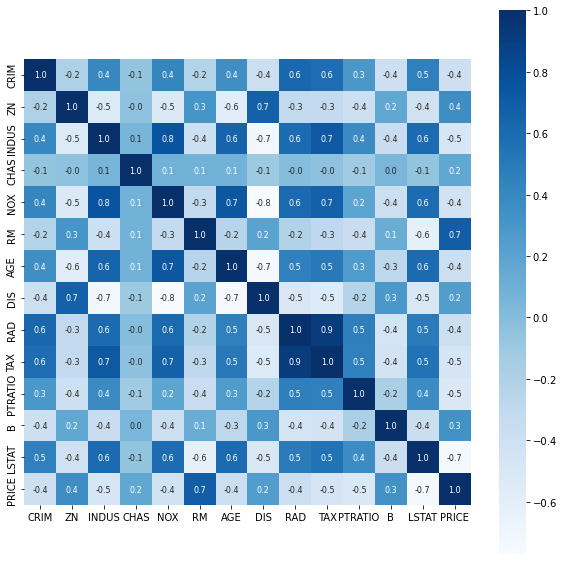

In [20]:
# constructing the heat map to understand the corr 
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True , square =True , fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [21]:
#set & see the FEATURE  and the corr prct to others

correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

CRIM   CRIM       1.000000
       ZN        -0.200469
       INDUS      0.406583
       CHAS      -0.055892
       NOX        0.420972
                    ...   
PRICE  TAX       -0.468536
       PTRATIO   -0.507787
       B          0.333461
       LSTAT     -0.737663
       PRICE      1.000000
Length: 196, dtype: float64

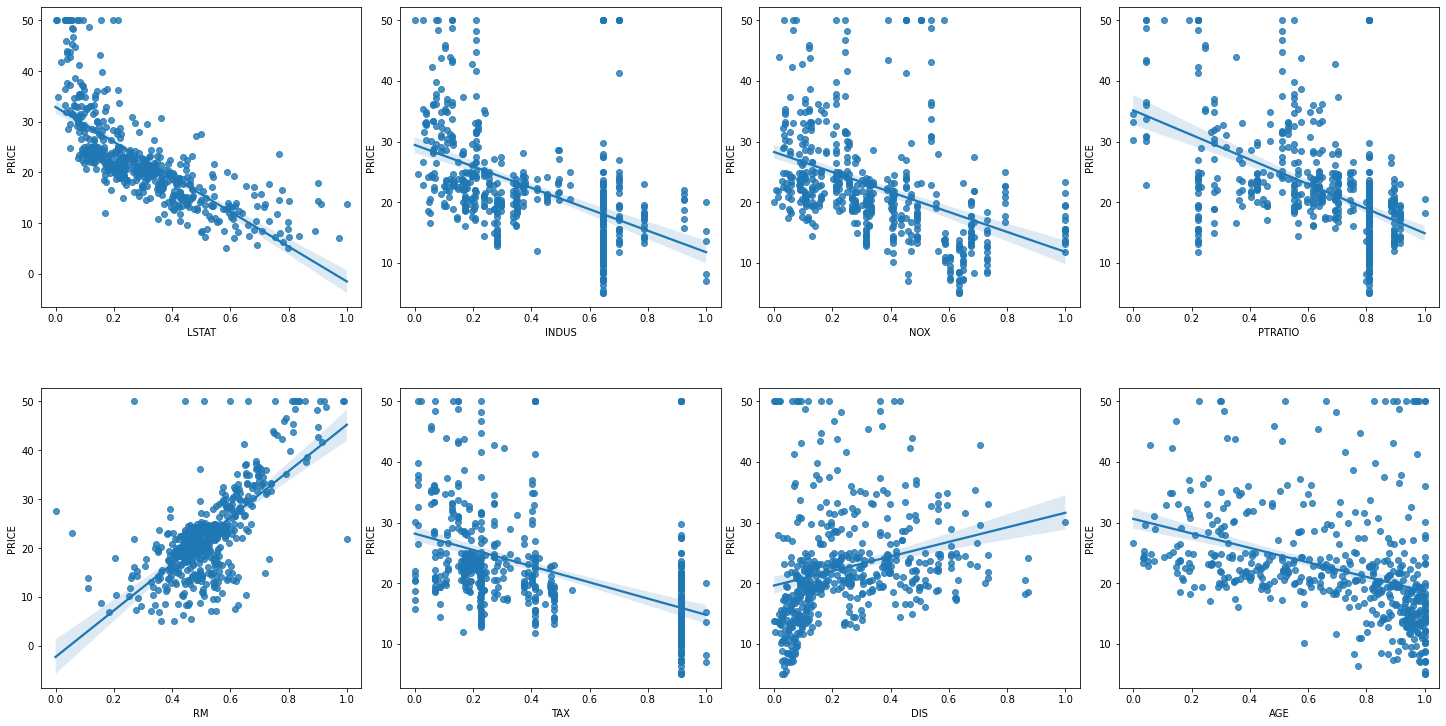

In [22]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = df.loc[:,column_sels]
y = df['PRICE']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

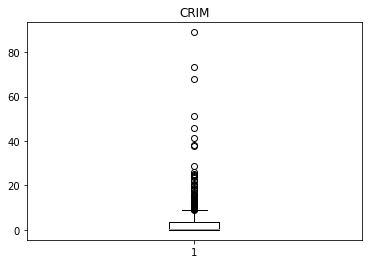

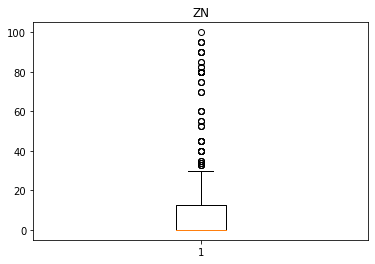

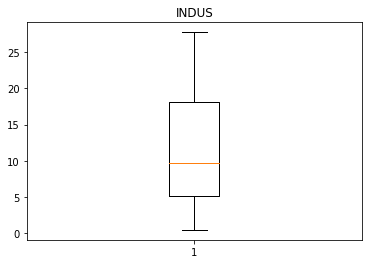

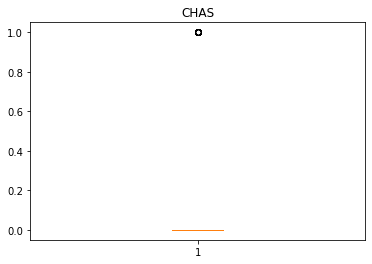

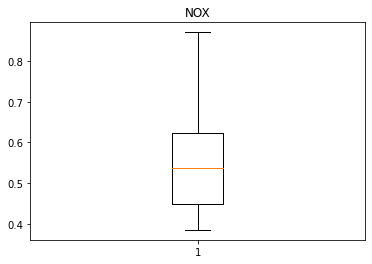

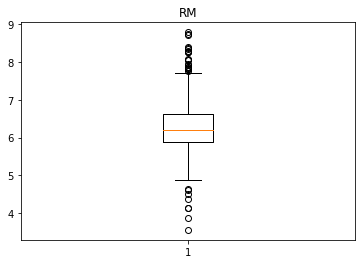

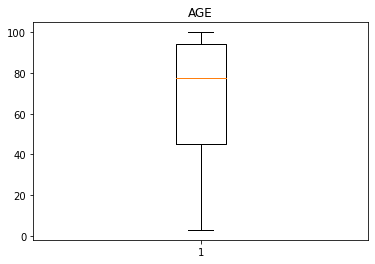

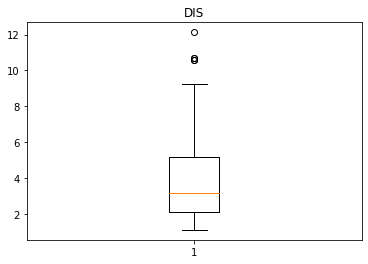

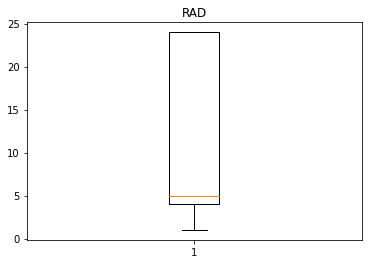

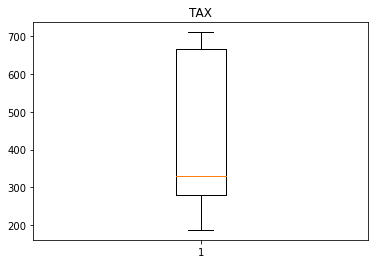

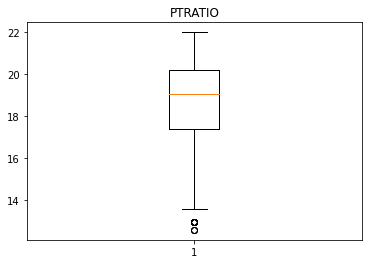

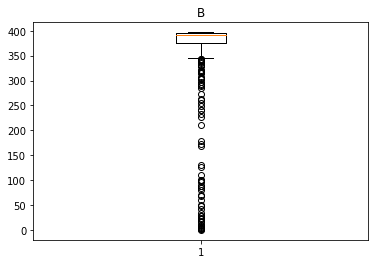

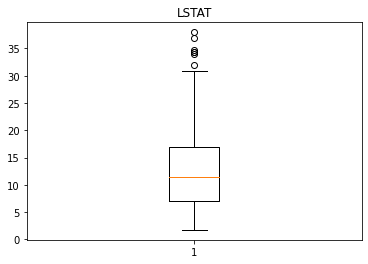

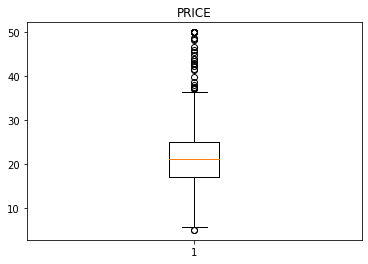

In [23]:
for col in df.columns:
    plt.figure()   # plots figure for each iteration
    title_boxplot = f'{col}'
    plt.title( title_boxplot )
    plt.boxplot(df[col])


In [24]:
# SPLITTING THE DATA AND TARGET 

x= df.drop(['PRICE'] , axis = 1)
y=df['PRICE']

In [25]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [26]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [27]:
#splitting the data into teaining data and test data 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


In [29]:
#model training  - XGBoost Regressor

model = XGBRegressor()


In [30]:
#training the model 
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
# predection on the training data 
# the accuracy of the training data 

training_data_pred = model.predict(x_train)
training_data_pred

array([25.245571 , 23.32921  ,  7.210682 , 21.154896 , 11.702352 ,
       26.999006 , 29.584614 , 26.544731 , 43.50524  , 23.625568 ,
       11.002917 , 33.40945  , 36.007214 , 36.40028  , 19.037712 ,
       20.18499  , 34.905746 , 49.99532  , 19.321676 , 14.898901 ,
       26.617535 , 19.894657 , 24.802687 , 21.180086 , 23.923895 ,
       20.586973 , 23.074522 , 27.950964 , 19.987543 , 23.094906 ,
       25.010534 ,  9.705043 , 23.892748 , 36.09172  , 13.418543 ,
       12.731809 , 39.79168  , 10.393237 , 20.598629 , 17.775103 ,
       19.482315 , 23.710855 , 28.513987 , 24.29506  , 23.771362 ,
       19.072584 , 28.377209 , 20.49642  , 33.825535 , 14.507262 ,
       20.39619  , 16.009405 , 13.304443 , 30.793392 , 27.49651  ,
       24.428276 , 24.389343 , 25.122246 , 43.8164   , 21.898586 ,
       26.22088  , 14.255268 , 20.789656 , 20.105751 , 23.099632 ,
       13.068087 , 16.195873 , 24.834087 , 20.208426 , 22.484184 ,
       14.791592 , 28.696594 , 20.114979 , 23.412987 , 31.9928

In [32]:
# squared error 

sc_1 = metrics.r2_score(y_train,training_data_pred)
sc_1

0.9999952977725205

In [33]:
# mean absouluote error
sc_2 = metrics.mean_absolute_error(y_train , training_data_pred)
sc_2

0.01375658535721277

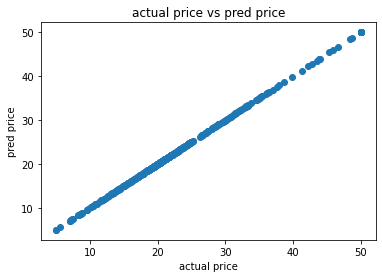

In [34]:
plt.scatter(y_train , training_data_pred)
plt.xlabel("actual price")
plt.ylabel("pred price")
plt.title("actual price vs pred price")
plt.show()

In [35]:
# predict on test data 

test_data_pred = model.predict ( x_test)
test_data_pred

array([30.359884, 27.026636, 19.17616 , 21.448114, 20.703493, 20.424747,
       27.9036  , 17.878405, 21.678137, 23.36513 , 25.411674, 33.19199 ,
       21.495481, 19.939993, 19.990822, 28.529932, 13.219593, 44.483154,
       25.460302, 11.562899, 19.486588, 17.153116, 24.325785, 23.509218,
       27.791344,  8.616411, 14.683976, 19.01615 , 45.651524, 12.10203 ,
       22.976582, 17.523937, 48.34446 , 16.573458, 24.024517, 21.818398,
       14.679352, 35.878193, 16.073364, 20.764208, 25.262817, 22.376215,
       24.78839 , 14.799538, 16.877083, 11.262062, 46.995094, 11.280138,
       21.217411, 18.637756, 23.77302 , 20.691387, 25.980684, 20.501291,
        8.173699, 22.731295, 11.759897, 24.526464, 18.271172, 38.32712 ,
       12.570583, 25.870787, 12.011916, 13.295293, 17.679295, 35.901722,
       37.55958 , 23.164257, 20.201231, 20.955679, 24.68425 ,  7.049963,
       18.19561 , 19.824377, 19.77468 , 20.867382, 40.98662 , 24.473787,
       27.369884, 31.096327, 16.441713, 19.326612, 

In [36]:
# squared error 

sc_11 = metrics.r2_score(y_test,test_data_pred)
sc_11

0.9085331557145866

In [37]:
# mean absouluote error
sc_22 = metrics.mean_absolute_error(y_test , test_data_pred)
sc_22

2.344013180452235